In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

from ovm.monetary.model import MonetaryModelHDF5DataCollectionFile
from ovm.monetary.plots import plot_all_model_level_variables
from ovm.paths import OUTPUT_PLOT_DIRECTORY
from ovm.time_resolution import TimeScale

environment variable OVERLAY_MONETARY_INPUT_BASE_PATH not set defaulting to /Volumes/GIT/PycharmProjects/overlay-monetary
environment variable OVERLAY_MONETARY_INPUT_BASE_PATH not set defaulting to /Volumes/GIT/PycharmProjects/overlay-monetary


In [3]:
plot_time_scale = TimeScale.YEARS
time_interval_to_plot_in_seconds = None

# Load HDF5 Results

## List all available HDF5 result files 

In [4]:
available_hdf5_files = MonetaryModelHDF5DataCollectionFile.available_hdf5_files()
available_hdf5_files

('/Volumes/GIT/PycharmProjects/overlay-monetary/agent_based_simulation_output_data/MonetaryModel_08-02-2021-09-10-00.h5',
 '/Volumes/GIT/PycharmProjects/overlay-monetary/agent_based_simulation_output_data/MonetaryModel_08-02-2021-09-11-15.h5')

## Load HDF5 result file associated with this run

In [5]:
hdf5_data_collection_file = \
    MonetaryModelHDF5DataCollectionFile(filepath=available_hdf5_files[-2])

In [6]:
figure_save_directory = os.path.join(OUTPUT_PLOT_DIRECTORY, hdf5_data_collection_file.simulation_start_time)

## Print model parameters of the simulation stored in the HDF5 file

In [7]:
hdf5_data_collection_file.describe()

HDF5 Agent Based Simulation Result
HDF5 File Path = /Volumes/GIT/PycharmProjects/overlay-monetary/agent_based_simulation_output_data/MonetaryModel_08-02-2021-09-10-00.h5
Number of simulation steps = 10582
GIT_BRANCH = new_optimization_branch
GIT_COMMIT_HASH = ac3fb601d408c4c9fb86fa8e2582744557fa9bc5
SIMULATION_START_TIME = 08-02-2021-09-10-00
base_liquidate_reward = 0.1
base_maintenance = 0.6
base_market_fee = 0.003
base_max_leverage = 10.0
base_wealth = 50.0
data_collection_interval = 1
historical_data_source = kucoin
is_resampled = None
liquidity = 28499.999999999996
num_arbitrageurs = 200
num_holders = 1000
num_keepers = 10
num_liquidators = 10
num_long_apes = 70
num_short_apes = 30
num_snipers = 100
num_traders = 10
numpy_seed = None
ovl_quote_ticker = OVL-ETH
ovl_ticker = SNX-ETH
quote_ticker = ETH
sampling_interval = 60
sampling_twap_granularity = 6
tickers = ['EOS-ETH', 'ETC-ETH', 'MKR-ETH', 'OVL-ETH', 'XRP-ETH']
time_resolution = 1m
treasury = None


# Model Level Variables from Stored HDF5 Results

## Load and Display Model Level Dataframe

In [8]:
model_df_from_hdf5 = hdf5_data_collection_file.get_model_dataframe()
model_df_from_hdf5.head()

,d-EOS-ETH,d-ETC-ETH,d-MKR-ETH,d-OVL-ETH,d-XRP-ETH,s-EOS-ETH,s-ETC-ETH,s-MKR-ETH,s-OVL-ETH,s-XRP-ETH,...,Reserve Skew XRP-ETH (% Difference),Number of Open Positions on EOS-ETH,Number of Open Positions on ETC-ETH,Number of Open Positions on MKR-ETH,Number of Open Positions on OVL-ETH,Number of Open Positions on XRP-ETH,Supply,Treasury,Liquidity,step
0,0.000000,-1.595148e-16,1.198317e-16,0.000000,1.239088e-16,0.027200,0.087000,3.70594,0.001000,0.003500,...,0.000000,0,0,0,0,0,100000.000000,0.000000,28500.0,0
1,0.813454,7.392695e-01,-5.743150e-04,0.176471,1.239088e-16,0.014999,0.050021,3.70807,0.000850,0.003500,...,0.000000,0,0,0,0,0,100000.000000,0.000000,28500.0,1
2,0.701636,4.500599e-01,-4.727926e-02,0.078656,2.806401e-01,0.014999,0.050020,3.65000,0.000988,0.002913,...,0.065712,1,1,1,1,1,99999.010418,0.989582,28500.0,2
3,0.874553,2.477458e-02,3.635085e-03,0.071711,1.992453e-01,0.012801,0.075880,3.70000,0.000931,0.002913,...,-0.002022,2,2,2,2,2,99998.297918,1.702082,28500.0,3
4,0.779721,1.493379e-01,-2.085565e-01,-0.050201,-1.805612e-01,0.012700,0.050203,5.00000,0.000986,0.004000,...,-0.063499,3,3,3,3,3,99996.977918,3.022082,28500.0,4


## Plot Model Level Variable Results

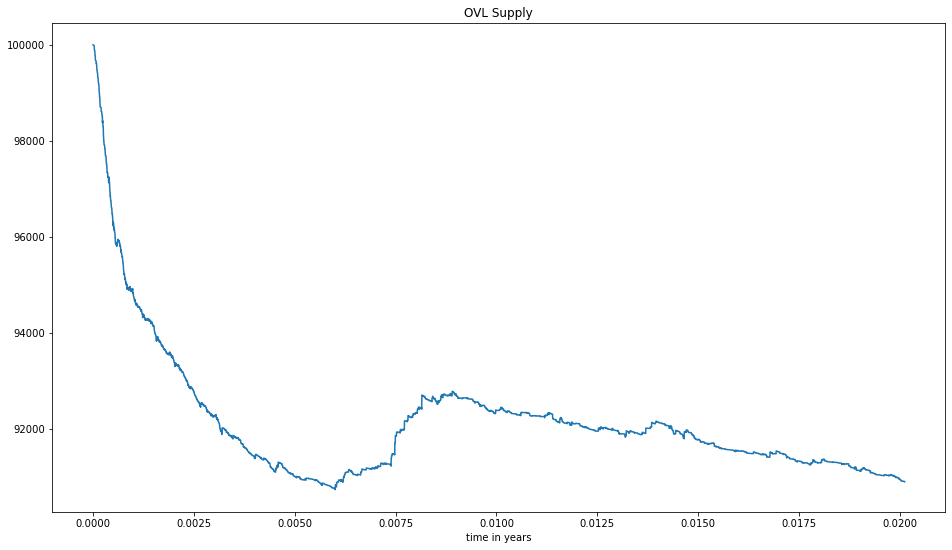

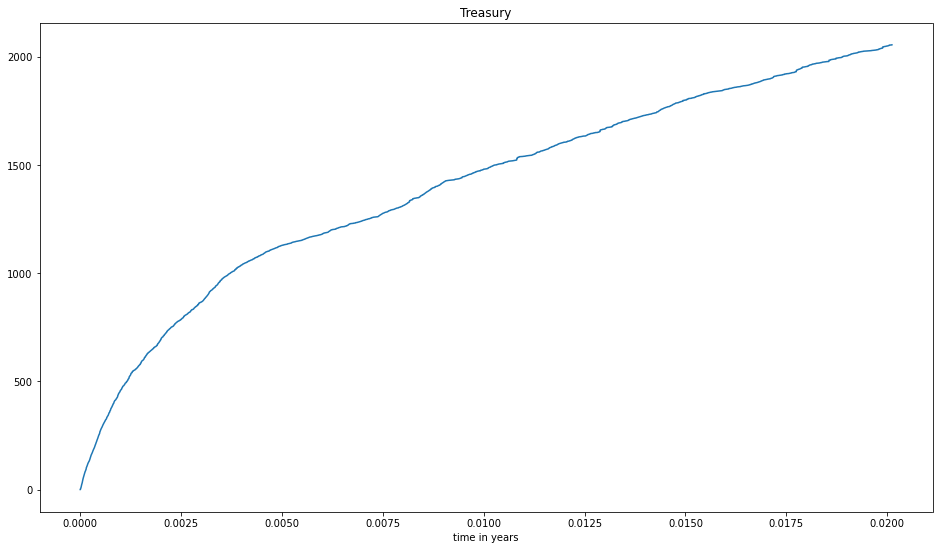

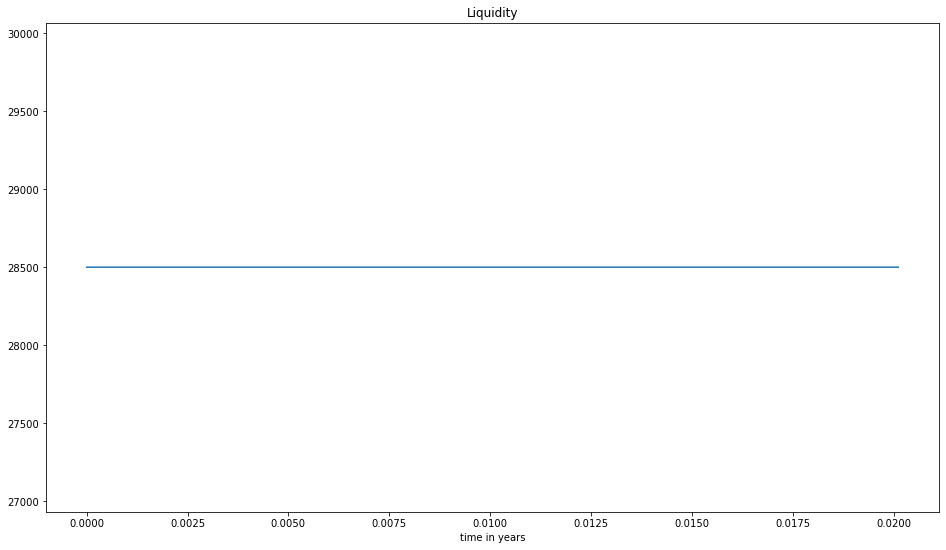

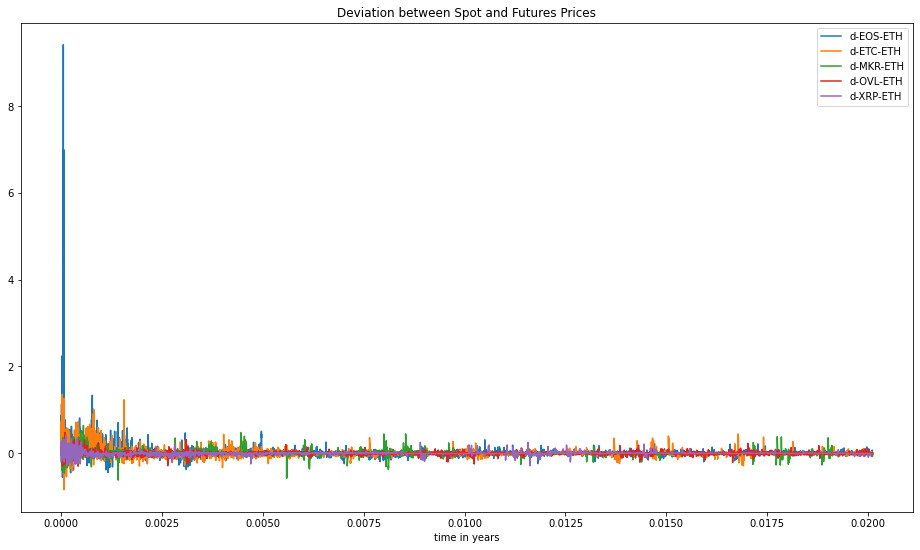

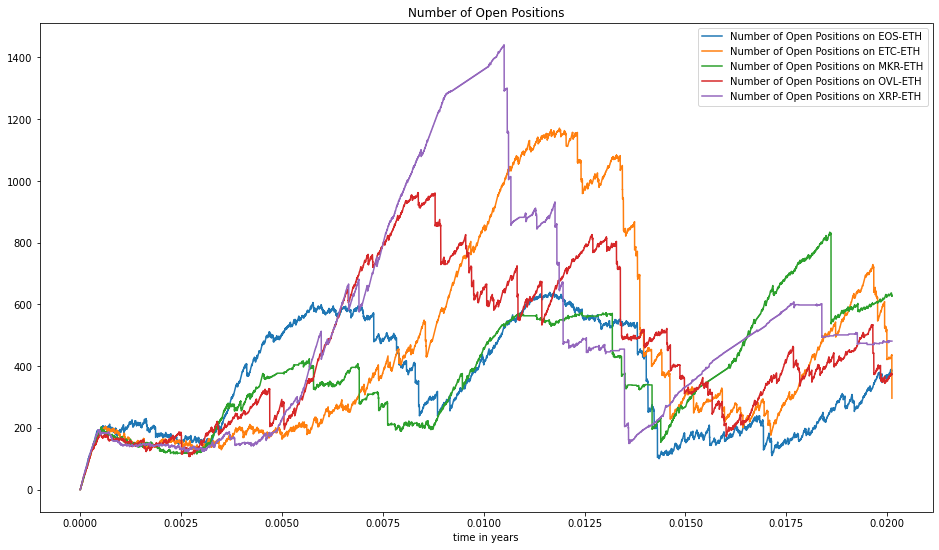

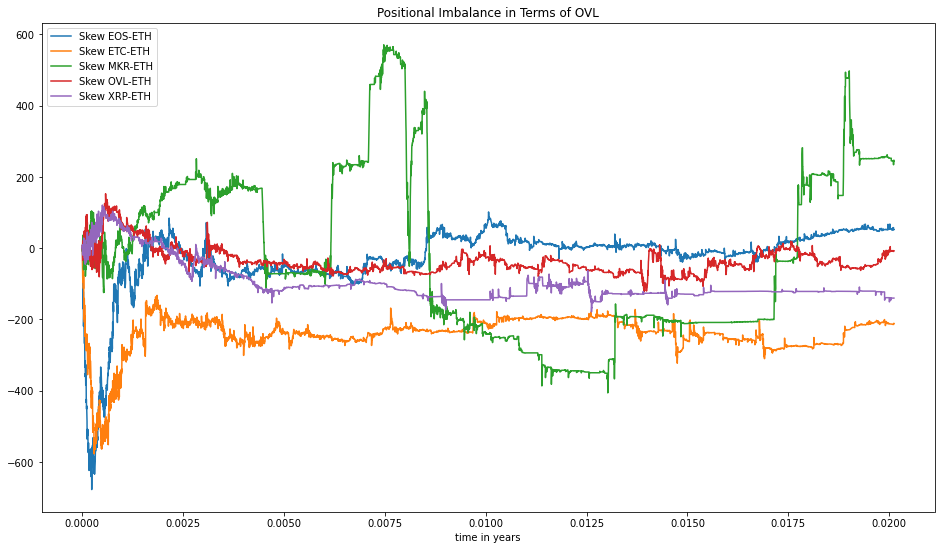

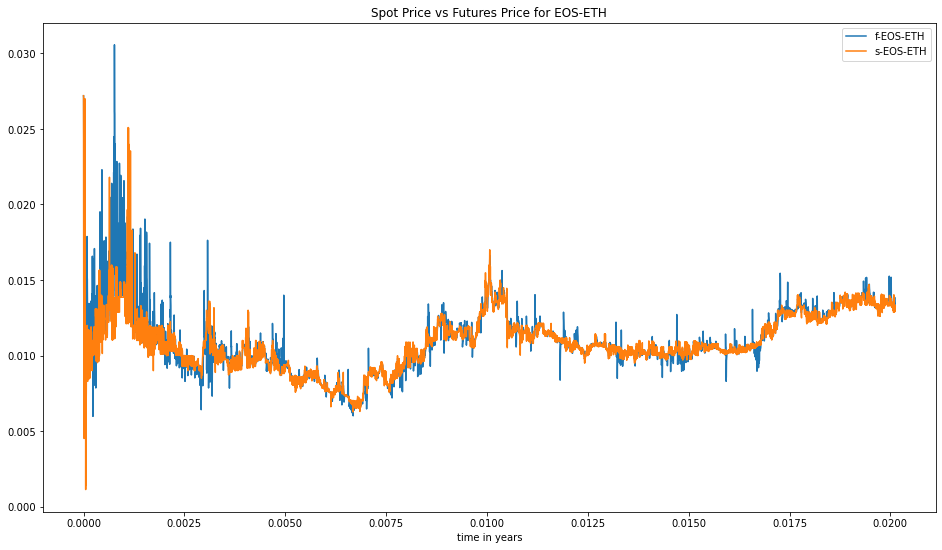

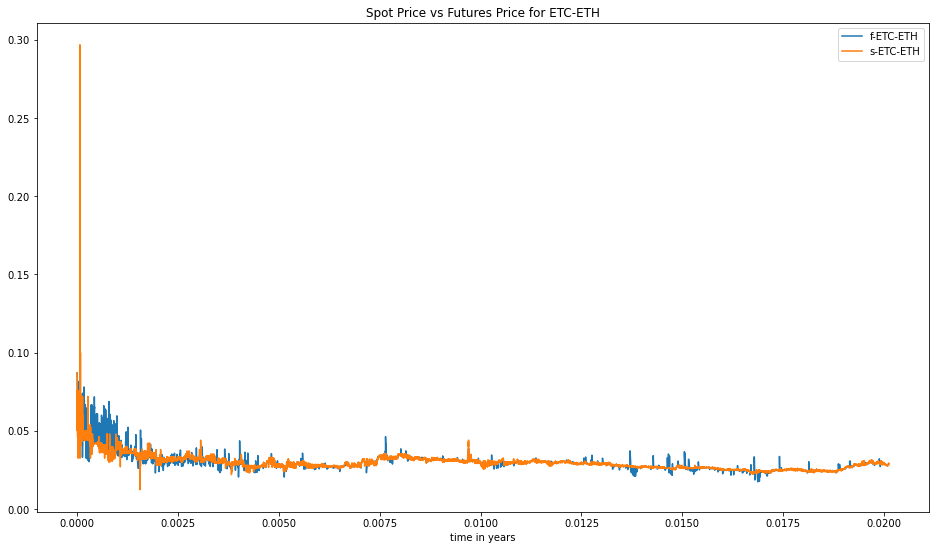

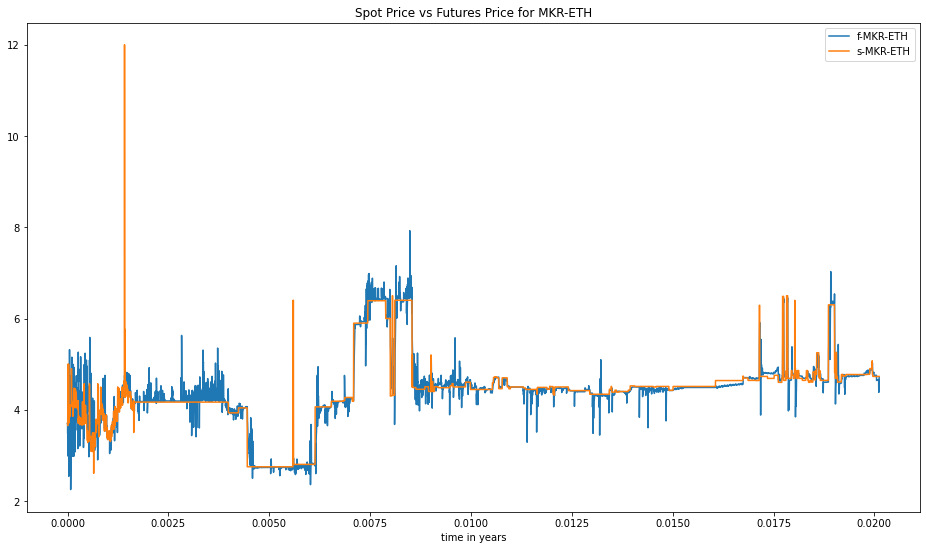

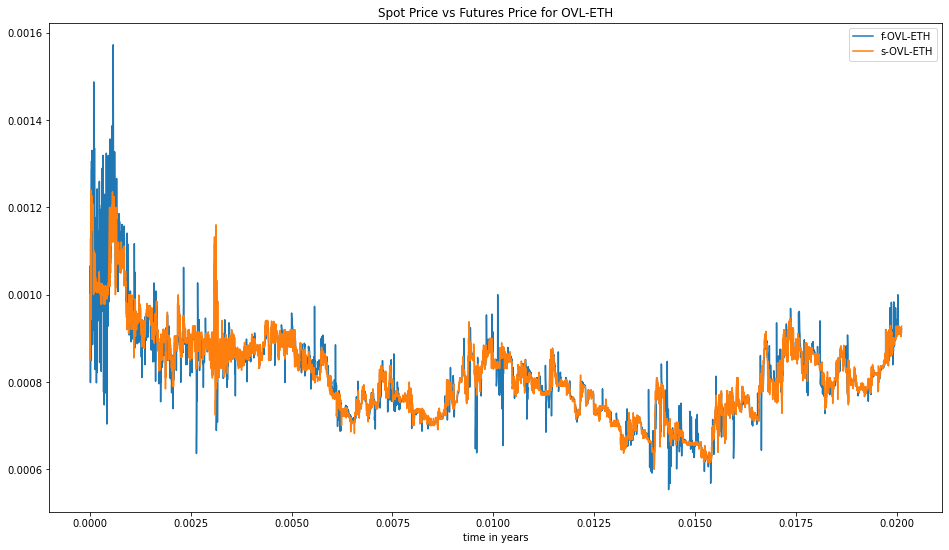

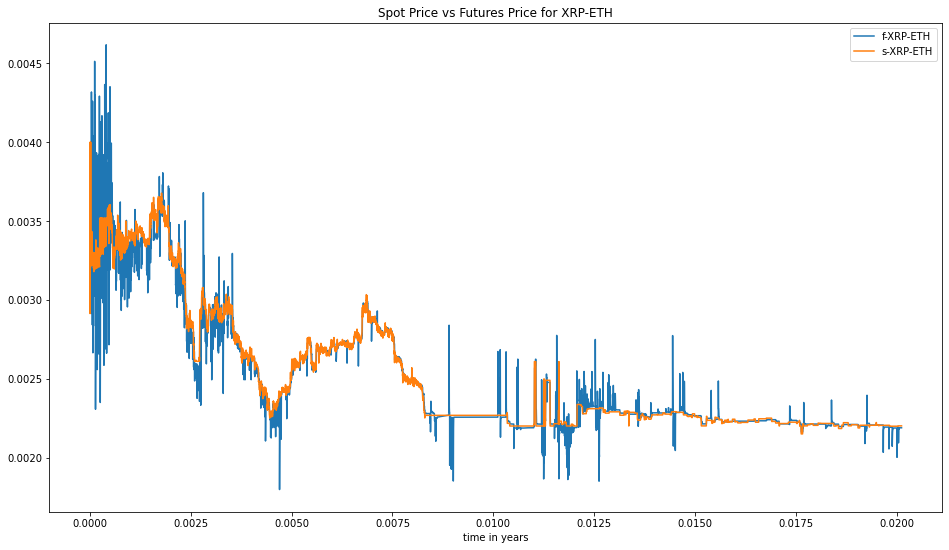

In [9]:
plot_all_model_level_variables(
    model_vars_df=model_df_from_hdf5, 
    tickers=hdf5_data_collection_file.tickers, 
    plot_time_scale=plot_time_scale, 
    time_interval_to_plot_in_seconds=time_interval_to_plot_in_seconds, 
    time_resolution=hdf5_data_collection_file.time_resolution, 
    data_interval=hdf5_data_collection_file.data_collection_interval, 
    figure_save_directory=figure_save_directory)

# Agent Level Variables

## List Agent Types in Simulation

In [10]:
hdf5_data_collection_file.agent_type_string_set

{'MonetaryApe',
 'MonetaryArbitrageur',
 'MonetaryHolder',
 'MonetaryKeeper',
 'MonetaryLiquidator',
 'MonetarySniper',
 'MonetaryTrader'}

## Plot Distribution of Terminal Wealth for All Agent Types

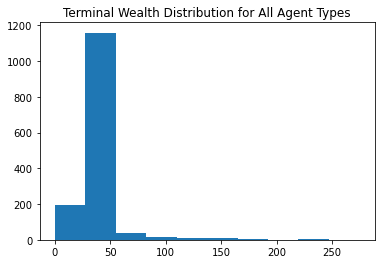

In [11]:
# terminal_wealth = \
#     (hdf5_data_collection_file.get_agent_report_dataframe_for_specific_time_step(time_step=-1)).loc[:, 'Wealth']

terminal_wealth = \
    (hdf5_data_collection_file.get_agent_report_series_for_specific_time_step(reporter_name='Wealth', time_step=-1))

plt.figure();
plt.hist(terminal_wealth);
plt.title(f'Terminal Wealth Distribution for All Agent Types');

## Plot Distribution of Terminal Wealth for Each Agent Type

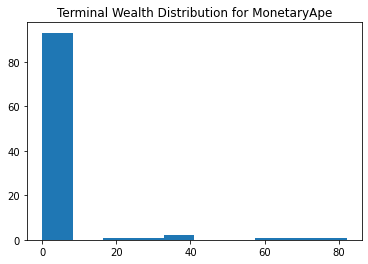

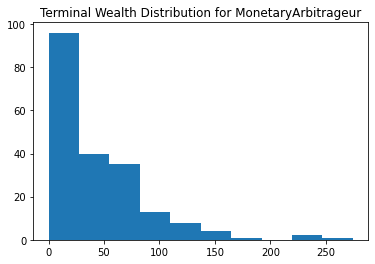

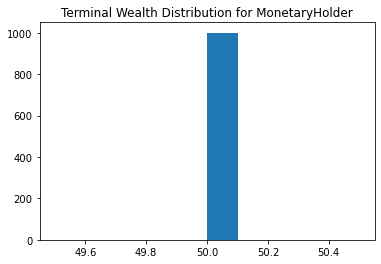

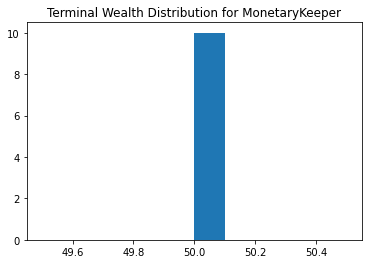

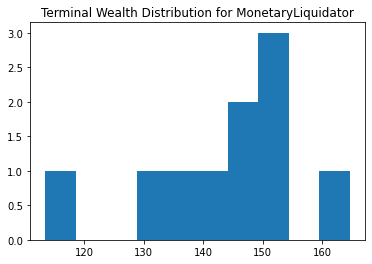

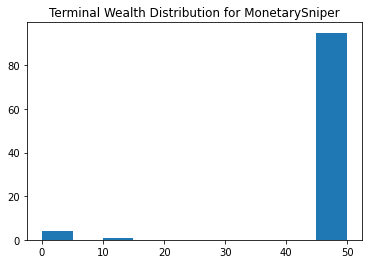

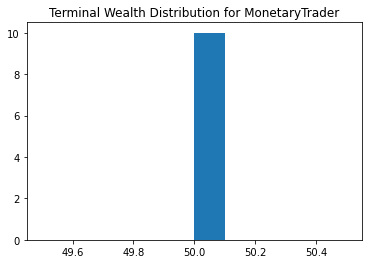

In [12]:
for agent_type_string in sorted(hdf5_data_collection_file.agent_type_string_set):
    terminal_wealth_for_agent_type = \
        (hdf5_data_collection_file
         .get_agent_report_dataframe_for_specific_time_step(
            time_step=-1, 
            agent_type_string=agent_type_string)).loc[:, 'Wealth']

    plt.figure();
    plt.hist(terminal_wealth_for_agent_type);
    plt.title(f'Terminal Wealth Distribution for {agent_type_string}')